# Методы оптимизации. Даниил Меркулов. Задача Линейного программирования. Симплекс метод

## Задача линейного программирования
Даны векторы $c \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ и матрица $A \in \mathbb{R}^{m \times n}$ такая что $\mathrm{rank}(A) = m$ 
### Стандартная форма
\begin{align*}
&\min_x c^{\top}x \\
\text{s.t. } & Ax \leq b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{align*}
![](https://www.varsitytutors.com/assets/vt-hotmath-legacy/hotmath_help/topics/linear-programming/lp.gif)
### Каноническая форма (везде далее рассматривается именно она)
\begin{align*}
&\min_x c^{\top}x \\
\text{s.t. } & Ax = b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{align*}
### Приведение к канонической форме:
* Неравенство в равенство (размерность задачи при этом увеличивается):
$$
Ax \leq b \leftrightarrow 
\begin{cases}
Ax + z =  b\\
z \geq 0
\end{cases}
$$
* Смена знака неравенства достигается путем умножения на $-1$

## Материалы
* Лекция В.Лемпицкого по Линейному Программированию [pdf](https://mega.nz/#!XUM1AQbb!CG3w6vakJICgoGT_Usg9crcp_T4gIPwCTqY-DjHKr8k), [видос](https://yadi.sk/i/uhmarI88kCRfw)
* Лекция В.Лемпицкого по Симплекс Методу [pdf](https://mega.nz/#!PUEUQAjI!4hN8D9QQu5MJo9VkrebeQsxGs9BlARAj3MU6VIA5458), [видос](https://yadi.sk/i/lzCxOVbnkFfZc)
* Примеры вычисления симплекс таблиц [здесь](https://github.com/amkatrutsa/MIPT-Opt/blob/master/17-LinProgSimplex/examples.pdf)
![](simplex.jpg)

## Как решать задачи линейного программирования СРАЗУ ЖЕ

В библиотеке scipy реализован симплекс метод в функции scipy.optimize.linprog(). Для того, чтобы посмотреть, как именно ей пользоваться, можно нажать Shift + Tab + Tab после того, как Вы перенесете курсор в скобочки

In [1]:
from scipy.optimize import linprog
linprog()

TypeError: linprog() missing 1 required positional argument: 'c'



\begin{align*}
&\min_x c^{\top}x \\
\text{s.t. } & Ax \leq b\\
x_2 \geq -3, \qquad &A = \begin{pmatrix}
    -3       & 1\\
    1      & 2
\end{pmatrix} \qquad b = \begin{pmatrix} 6 \\ 4\end{pmatrix}
\end{align*}

In [41]:
c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)
from scipy.optimize import linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds),
              options={"disp": True})

print(res)

Optimization terminated successfully.
         Current function value: -22.000000  
         Iterations: 1
     fun: -22.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([39.,  0.])
  status: 0
 success: True
       x: array([10., -3.])


In [42]:
# Если хотите рисовать поганейшие таблички, добавляйте callback
import scipy

c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)
from scipy.optimize import linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds),
              options={"disp": True}, callback=scipy.optimize.linprog_verbose_callback)

# print(res.tableau)

--------- Initial Tableau - Phase 1 ----------

[[      3.0000      -3.0000       1.0000       1.0000       0.0000       9.0000]
 [     -1.0000       1.0000       2.0000       0.0000       1.0000      10.0000]
 [      1.0000      -1.0000       4.0000       0.0000       0.0000      12.0000]
 [      0.0000       0.0000       0.0000       0.0000       0.0000       0.0000]]

Pivot Element: T[nan, nan]

Basic Variables: [3 4]

Current Solution:
x =  [      0.0000       0.0000       0.0000]

Current Objective Value:
f =  -0.0

--------- Initial Tableau - Phase 2 ----------

[[      3.0000      -3.0000       1.0000       1.0000       0.0000       9.0000]
 [     -1.0000       1.0000       2.0000       0.0000       1.0000      10.0000]
 [      1.0000      -1.0000       4.0000       0.0000       0.0000      12.0000]]

Pivot Element: T[1, 1]

Basic Variables: [3 4]

Current Solution:
x =  [      0.0000       0.0000       0.0000]

Current Objective Value:
f =  -12.0

--------- Iteration Complete -

Еще один практический пример. Взято [отсюда](https://www.analyticsvidhya.com/blog/2017/10/linear-optimization-in-python/).

Для этого понадобится библиотека `pulp`. Если со следующей строчкой возникнут проблемы, то запустите эту команду без восклицательного знака в командной строке.

In [ ]:
!pip install pulp

In [43]:
% matplotlib inline
 
from pulp import *
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import Image

In [44]:
# Download the dataset from https://www.kaggle.com/rounakbanik/ted-talks

# Read the dataset into pandas dataframe, convert duration from seconds to minutes
ted = pd.read_csv('ted_main.csv', encoding='ISO-8859-1')
ted['duration'] = ted['duration'] / 60
ted = ted.round({'duration': 1})

# Select subset of columns & rows (if required)
# data = ted.sample(n=1000) # 'n' can be changed as required
data = ted
selected_cols = ['name', 'event', 'duration', 'views']
data.reset_index(inplace=True)
data.head()

,index,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,19.4,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,1,265,With the same humor and humanity he exuded in ...,16.3,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,2,124,New York Times columnist David Pogue takes aim...,21.4,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,3,200,"In an emotionally charged talk, MacArthur-winn...",18.6,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,4,593,You've never seen data presented like this. Wi...,19.8,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [45]:
# create LP object,
# set up as a maximization problem --> since we want to maximize the number of TED talks to watch
prob = pulp.LpProblem('WatchingTEDTalks', pulp.LpMaximize)

In [46]:
# create decision - yes or no to watch the talk?
decision_variables = []
for rownum, row in data.iterrows():
    # variable = set('x' + str(rownum))
    variable = str('x' + str(row['index']))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat = 'Integer') # make variable binary
    decision_variables.append(variable)
    
print('Total number of decision variables: ' + str(len(decision_variables)))

Total number of decision variables: 2550


In [47]:
# Create optimization Function
total_views = ''
for rownum, row in data.iterrows():
    for i,talk in enumerate(decision_variables):
        if rownum == i:
            formula = row['views'] * talk
            total_views += formula
            
prob += total_views
# print('Optimization function: ' + str(total_views))

In [48]:
# Contraints
total_time_available_for_talks = 3*60 # Total time available is 10 hours . Converted to minutes
total_talks_can_watch = 8 # Don't want an overload information

In [49]:
# Create Constraint 1 - Time for talks
total_time_talks = ''
for rownum, row in data.iterrows():
    for i,  talk in enumerate(decision_variables):
        if rownum == i:
            formula = row['duration']*talk
            total_time_talks += formula
            
prob += (total_time_talks == total_time_available_for_talks)

In [50]:
# Create Constraint 2 - Number of talks
total_talks = ''

for rownum, row in data.iterrows():
    for i, talk in enumerate(decision_variables):
        if rownum == i:
            formula = talk
            total_talks += formula
            
prob += (total_talks == total_talks_can_watch)

In [51]:
print(prob)
prob.writeLP('WatchingTEDTalks.lp')

WatchingTEDTalks:
MAXIMIZE
47227110*x0 + 3200520*x1 + 1211416*x10 + 717002*x100 + 1079565*x1000 + 5447236*x1001 + 1055562*x1002 + 1399333*x1003 + 740934*x1004 + 983929*x1005 + 1451656*x1006 + 790122*x1007 + 593099*x1008 + 693722*x1009 + 1451846*x101 + 946354*x1010 + 992224*x1011 + 1264969*x1012 + 872169*x1013 + 852507*x1014 + 647752*x1015 + 293626*x1016 + 1564173*x1017 + 1783040*x1018 + 834926*x1019 + 577502*x102 + 484266*x1020 + 1258574*x1021 + 1390908*x1022 + 667985*x1023 + 399332*x1024 + 2204314*x1025 + 787092*x1026 + 1776828*x1027 + 598693*x1028 + 3729820*x1029 + 1683456*x103 + 8744428*x1030 + 975365*x1031 + 502832*x1032 + 2901853*x1033 + 950387*x1034 + 576592*x1035 + 16861578*x1036 + 1426518*x1037 + 3630894*x1038 + 1048905*x1039 + 779873*x104 + 471545*x1040 + 841471*x1041 + 729857*x1042 + 2487499*x1043 + 648251*x1044 + 1067460*x1045 + 507746*x1046 + 933319*x1047 + 822884*x1048 + 1529057*x1049 + 940913*x105 + 924764*x1050 + 1736183*x1051 + 1042789*x1052 + 148971*x1053 + 291251*x105

In [52]:
optimization_result = prob.solve()

assert optimization_result == pulp.LpStatusOptimal
print('Status:', LpStatus[prob.status])
print('Optimal Solution to the problem: ', value(prob.objective))
print('Individual decision variables: ')
for v in prob.variables():
    print(v.name, '=', v.varValue)

Status: Optimal
Optimal Solution to the problem:  219043324.0
Individual decision variables: 
x0 = 1.0
x1 = 0.0
x10 = 0.0
x100 = 0.0
x1000 = 0.0
x1001 = 0.0
x1002 = 0.0
x1003 = 0.0
x1004 = 0.0
x1005 = 0.0
x1006 = 0.0
x1007 = 0.0
x1008 = 0.0
x1009 = 0.0
x101 = 0.0
x1010 = 0.0
x1011 = 0.0
x1012 = 0.0
x1013 = 0.0
x1014 = 0.0
x1015 = 0.0
x1016 = 0.0
x1017 = 0.0
x1018 = 0.0
x1019 = 0.0
x102 = 0.0
x1020 = 0.0
x1021 = 0.0
x1022 = 0.0
x1023 = 0.0
x1024 = 0.0
x1025 = 0.0
x1026 = 0.0
x1027 = 0.0
x1028 = 0.0
x1029 = 0.0
x103 = 0.0
x1030 = 0.0
x1031 = 0.0
x1032 = 0.0
x1033 = 0.0
x1034 = 0.0
x1035 = 0.0
x1036 = 0.0
x1037 = 0.0
x1038 = 0.0
x1039 = 0.0
x104 = 0.0
x1040 = 0.0
x1041 = 0.0
x1042 = 0.0
x1043 = 0.0
x1044 = 0.0
x1045 = 0.0
x1046 = 0.0
x1047 = 0.0
x1048 = 0.0
x1049 = 0.0
x105 = 0.0
x1050 = 0.0
x1051 = 0.0
x1052 = 0.0
x1053 = 0.0
x1054 = 0.0
x1055 = 0.0
x1056 = 0.0
x1057 = 0.0
x1058 = 0.0
x1059 = 0.0
x106 = 0.0
x1060 = 0.0
x1061 = 0.0
x1062 = 0.0
x1063 = 0.0
x1064 = 0.0
x1065 = 0.0
x1066 = 0

x1746 = 0.0
x1747 = 0.0
x1748 = 0.0
x1749 = 0.0
x175 = 0.0
x1750 = 0.0
x1751 = 0.0
x1752 = 0.0
x1753 = 0.0
x1754 = 0.0
x1755 = 0.0
x1756 = 0.0
x1757 = 0.0
x1758 = 0.0
x1759 = 0.0
x176 = 0.0
x1760 = 0.0
x1761 = 0.0
x1762 = 0.0
x1763 = 0.0
x1764 = 0.0
x1765 = 0.0
x1766 = 0.0
x1767 = 0.0
x1768 = 0.0
x1769 = 0.0
x177 = 0.0
x1770 = 0.0
x1771 = 0.0
x1772 = 0.0
x1773 = 0.0
x1774 = 0.0
x1775 = 0.0
x1776 = 0.0
x1777 = 0.0
x1778 = 0.0
x1779 = 0.0
x178 = 0.0
x1780 = 0.0
x1781 = 0.0
x1782 = 0.0
x1783 = 0.0
x1784 = 0.0
x1785 = 0.0
x1786 = 0.0
x1787 = 0.0
x1788 = 0.0
x1789 = 0.0
x179 = 0.0
x1790 = 0.0
x1791 = 0.0
x1792 = 0.0
x1793 = 0.0
x1794 = 0.0
x1795 = 0.0
x1796 = 0.0
x1797 = 0.0
x1798 = 0.0
x1799 = 0.0
x18 = 0.0
x180 = 0.0
x1800 = 0.0
x1801 = 0.0
x1802 = 0.0
x1803 = 0.0
x1804 = 0.0
x1805 = 0.0
x1806 = 0.0
x1807 = 0.0
x1808 = 0.0
x1809 = 0.0
x181 = 0.0
x1810 = 0.0
x1811 = 0.0
x1812 = 0.0
x1813 = 0.0
x1814 = 0.0
x1815 = 0.0
x1816 = 0.0
x1817 = 0.0
x1818 = 0.0
x1819 = 0.0
x182 = 0.0
x1820 = 0.0
x1

x350 = 0.0
x351 = 0.0
x352 = 0.0
x353 = 0.0
x354 = 0.0
x355 = 0.0
x356 = 0.0
x357 = 0.0
x358 = 0.0
x359 = 0.0
x36 = 0.0
x360 = 0.0
x361 = 0.0
x362 = 0.0
x363 = 0.0
x364 = 0.0
x365 = 0.0
x366 = 0.0
x367 = 0.0
x368 = 0.0
x369 = 0.0
x37 = 0.0
x370 = 0.0
x371 = 0.0
x372 = 0.0
x373 = 0.0
x374 = 0.0
x375 = 0.0
x376 = 0.0
x377 = 0.0
x378 = 0.0
x379 = 0.0
x38 = 0.0
x380 = 0.0
x381 = 0.0
x382 = 0.0
x383 = 0.0
x384 = 0.0
x385 = 0.0
x386 = 0.0
x387 = 0.0
x388 = 0.0
x389 = 0.0
x39 = 0.0
x390 = 0.0
x391 = 0.0
x392 = 0.0
x393 = 0.0
x394 = 0.0
x395 = 0.0
x396 = 0.0
x397 = 0.0
x398 = 0.0
x399 = 0.0
x4 = 0.0
x40 = 0.0
x400 = 0.0
x401 = 0.0
x402 = 0.0
x403 = 0.0
x404 = 0.0
x405 = 0.0
x406 = 0.0
x407 = 0.0
x408 = 0.0
x409 = 0.0
x41 = 0.0
x410 = 0.0
x411 = 0.0
x412 = 0.0
x413 = 0.0
x414 = 0.0
x415 = 0.0
x416 = 0.0
x417 = 0.0
x418 = 0.0
x419 = 0.0
x42 = 0.0
x420 = 0.0
x421 = 0.0
x422 = 0.0
x423 = 0.0
x424 = 0.0
x425 = 0.0
x426 = 0.0
x427 = 0.0
x428 = 0.0
x429 = 0.0
x43 = 0.0
x430 = 0.0
x431 = 0.0
x432 = 0.

In [53]:
# reorder results
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)
    
df = pd.DataFrame({'index': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
    value = re.findall(r'(\d+)', row['index'])
    df.loc[rownum, 'index'] = int(value[0])
    
# df = df.sort_index(by = 'index')
df = df.sort_values(by = 'index')
result = pd.merge(data, df, on = 'index')
result = result[result['value'] == 1].sort_values(by = 'views', ascending = False)
selected_cols_final = ['name', 'event', 'duration', 'views']
final_set_of_talks_to_watch = result[selected_cols_final]

In [54]:
from IPython.display import display, HTML
display(HTML(final_set_of_talks_to_watch.to_html(index=False)))

name,event,duration,views
Ken Robinson: Do schools kill creativity?,TED2006,19.4,47227110
Amy Cuddy: Your body language may shape who yo...,TEDGlobal 2012,21.0,43155405
Simon Sinek: How great leaders inspire action,TEDxPuget Sound,18.1,34309432
BrenÃ© Brown: The power of vulnerability,TEDxHouston,20.3,31168150
Mary Roach: 10 things you didn't know about or...,TED2009,16.7,22270883
Jill Bolte Taylor: My stroke of insight,TED2008,18.3,21190883
Dan Pink: The puzzle of motivation,TEDGlobal 2009,18.6,18830983
"Gretchen Carlson, David Brooks: Political comm...",TED Dialogues,47.6,890478


## Пример, когда симплекс метод работает так себе. [Klee, Minty (1972)](https://en.wikipedia.org/wiki/Klee%E2%80%93Minty_cube) 
В задаче 
\begin{align*} & \max_{x \in \mathbb{R}^n} 2^{n-1}x_1 + 2^{n-2}x2 + \dots + 2x{n-1} + x_n\\
\text{s.t. } & x_1 \leq 5\\
& 4x_1 + x_2 \leq 25\\
& 8x_1 + 4x_2 + x_3 \leq 125\\
& \ldots\\
& 2^n x_1 + 2^{n-1}x_2 + 2^{n-2}x_3 + \ldots + x_n \leq 5^n\ & x \geq 0 
\end{align*} начиная с точки $x_0 = 0$ и следуя симплекс-методу, необходимо обойти $2^n - 1$ вершину. Запустим примеры [А. Катруцы](https://github.com/amkatrutsa/MIPT-Opt/blob/master/17-LinProgSimplex/Seminar17.ipynb)

In [55]:
def generate_KleeMinty_test_problem(n):
    c = np.array([2**i for i in range(n)])
    c = c[::-1]
    bounds = [(0, None) for i in range(n)]
    b = np.array([5**(i+1) for i in range(n)])
    a = np.array([1] + [2**(i+1) for i in range(1, n)])
    A = np.zeros((n, n))
    for i in range(n):
        A[i:, i] = a[:n-i]
    return -c, A, b, bounds

In [56]:
def generate_random_LP_problem(n):
    c = np.random.rand(n)
    A = np.random.rand(n,n)
    b = np.random.rand(n)
    bounds = []
    for i in range(n):
        bound = (-np.random.rand(1), np.random.rand(1))
        bounds.append(bound)
    return c, A, b, bounds

In [57]:
import numpy as np
n = 5
c, A, b, bounds = generate_KleeMinty_test_problem(n)
print(c)
print(A) 
print(b)
print(bounds)

[-16  -8  -4  -2  -1]
[[ 1.  0.  0.  0.  0.]
 [ 4.  1.  0.  0.  0.]
 [ 8.  4.  1.  0.  0.]
 [16.  8.  4.  1.  0.]
 [32. 16.  8.  4.  1.]]
[   5   25  125  625 3125]
[(0, None), (0, None), (0, None), (0, None), (0, None)]


In [58]:
res = linprog(c, A, b, bounds=bounds)
print(res)

     fun: -3125.0
 message: 'Optimization terminated successfully.'
     nit: 31
   slack: array([  5.,  25., 125., 625.,   0.])
  status: 0
 success: True
       x: array([   0.,    0.,    0.,    0., 3125.])


In [64]:
n_list = range(3, 16)
n_iters = np.zeros(len(n_list))
times = np.zeros(len(n_list))
for i, n in enumerate(n_list):
    c, A, b, bounds = generate_KleeMinty_test_problem(n)
    res = linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list)})
    time = %timeit -o -n 1 linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list) + 1})
    n_iters[i] = res.nit
    times[i] = time.best

5.53 ms ± 877 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.2 ms ± 3.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
18.1 ms ± 834 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
36.6 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
75.6 ms ± 6.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
147 ms ± 8.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
289 ms ± 9.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
579 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.17 s ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.38 s ± 73.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.75 s ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.74 s ± 292 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
19.7 s ± 403 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


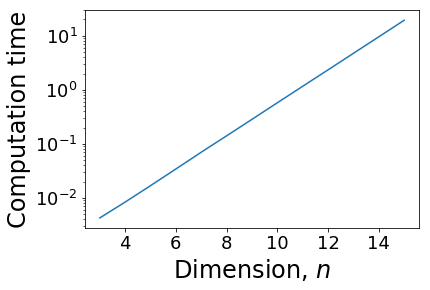

In [65]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.semilogy(n_list, times)
plt.xlabel("Dimension, $n$", fontsize=24)
plt.ylabel("Computation time", fontsize=24)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

In [66]:
n_list_r = range(3, 16)
n_iters_r = np.zeros(len(n_list_r))
times_r = np.zeros(len(n_list_r))
for i, n in enumerate(n_list_r):
    c, A, b, bounds = generate_random_LP_problem(n)
    res = linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list)})
    time = %timeit -o linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list) + 1})
    n_iters_r[i] = res.nit
    times_r[i] = time.best

475 µs ± 64.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
456 µs ± 2.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
492 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
529 µs ± 4.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
586 µs ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
594 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
731 µs ± 196 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
661 µs ± 4.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
692 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
730 µs ± 1.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
759 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
866 µs ± 75.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
881 µs ± 114 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


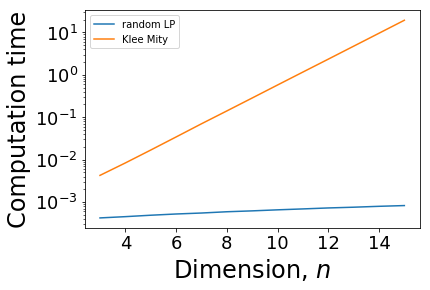

In [67]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.semilogy(n_list_r, times_r, label='random LP')
plt.semilogy(n_list, times, label = 'Klee Mity')
plt.legend()
plt.xlabel("Dimension, $n$", fontsize=24)
plt.ylabel("Computation time", fontsize=24)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

In [ ]:
# Stylish cell, better to compile at the beginning
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'fontsize': 4,
              'theme': 'simple_cyr',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
              'height': '724',
              'scroll': True,
              'slideNumber': True
})


from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()